In [1]:
from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bug_df = pd.read_csv('./bug/so details.txt')
bug_df.info()
bug_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   3636 non-null   object 
 1   Title          3636 non-null   object 
 2   Tags           3636 non-null   object 
 3   Score          3636 non-null   int64  
 4   AnswerCount    3636 non-null   int64  
 5   CommentCount   3636 non-null   int64  
 6   FavoriteCount  702 non-null    float64
 7   w2v_title      3636 non-null   object 
 8   w2v_tag        3636 non-null   object 
 9   title+tag      3636 non-null   object 
 10  w2v_title+tag  3636 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 312.6+ KB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount,w2v_title,w2v_tag,title+tag,w2v_title+tag
0,2012-07-10T14:09:47.123,How to enable the Java keyword assert in Eclip...,java eclipse assert assertions,64,6,1,8.0,"[-0.06919835747352668, -0.039465038904121945, ...","[-0.11689873645082116, 0.3525516837835312, 0.1...",How to enable the Java keyword assert in Eclip...,"[0.24032320082187653, 0.8867842555046082, 0.59..."
1,2012-10-08T12:46:21.523,Stack program in Java without using built-in c...,java data-structures,0,3,4,NaN,"[-0.15744633546897344, 0.026102273325834955, -...","[0.1382400542497635, -0.023948220536112785, -0...",Stack program in Java without using built-in c...,"[0.24032320082187653, 0.42886120080947876, 0.3..."


In [3]:
non_bug_df = pd.read_csv('./non_bug/so details.txt')
non_bug_df.info()
non_bug_df.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   17986 non-null  object 
 1   Title          17986 non-null  object 
 2   Tags           17986 non-null  object 
 3   Score          17986 non-null  int64  
 4   AnswerCount    17986 non-null  int64  
 5   CommentCount   17986 non-null  int64  
 6   FavoriteCount  3427 non-null   float64
 7   w2v_title      17986 non-null  object 
 8   w2v_tag        17986 non-null  object 
 9   title+tag      17986 non-null  object 
 10  w2v_title+tag  17986 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.5+ MB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount,w2v_title,w2v_tag,title+tag,w2v_title+tag
0,2018-08-06T01:49:50.053,Inconsistency in Java's compareTo method on St...,java comparator,0,0,3,NaN,"[0.1918523281812668, -0.25205946564674375, -0....","[0.007734555751085281, -0.09128731675446033, -...",Inconsistency in Java's compareTo method on St...,"[0.6235586404800415, 0.04729170724749565, 0.15..."
1,2018-08-06T01:49:50.053,Inconsistency in Java's compareTo method on St...,java comparator,0,0,3,NaN,"[0.1918523281812668, -0.25205946564674375, -0....","[0.007734555751085281, -0.09128731675446033, -...",Inconsistency in Java's compareTo method on St...,"[0.6235586404800415, 0.04729170724749565, 0.15..."


In [54]:
# sum_same = 0
# for i in tqdm(range(len(bug_df))):
#     if bug_df['Title'][i] in non_bug_df['Title'].values:
#         sum_same += 1
# sum_same

100%|██████████| 1842/1842 [00:00<00:00, 9375.35it/s] 


1070

In [125]:

# df = pd.concat([bug_df, non_bug_df])
# df.index = list(range(len(df)))
# df = df.drop_duplicates(keep=False)
# len(df)
#

5651

In [126]:
# bug_df = df[:len(bug_df)-1070]
# bug_df.index = list(range(len(bug_df)))
# len(bug_df)

772

In [127]:
# non_bug_df = df[len(bug_df):]
# non_bug_df.index = list(range(len(non_bug_df)))
# len(non_bug_df)

4879

In [128]:
# bug_df.info()
# bug_df.head(2)
#

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 771
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   772 non-null    object 
 1   Title          772 non-null    object 
 2   Tags           772 non-null    object 
 3   Score          772 non-null    int64  
 4   AnswerCount    772 non-null    int64  
 5   CommentCount   772 non-null    int64  
 6   FavoriteCount  178 non-null    float64
 7   w2v_title      772 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 54.3+ KB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount,w2v_title
0,2012-10-08T12:46:21.523,Stack program in Java without using built-in c...,java data-structures,0,3,4,NaN,"[0.24032320082187653, 0.42886120080947876, 0.3..."
1,2011-10-26T09:04:40.913,How to subclass ConcurrentSkipListMap and set ...,java subclass,0,1,0,NaN,"[0.26461395621299744, 0.5018517374992371, 0.42..."


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4879 entries, 0 to 4878
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   4879 non-null   object 
 1   Title          4879 non-null   object 
 2   Tags           4879 non-null   object 
 3   Score          4879 non-null   int64  
 4   AnswerCount    4879 non-null   int64  
 5   CommentCount   4879 non-null   int64  
 6   FavoriteCount  1146 non-null   float64
 7   w2v_title      4879 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 343.1+ KB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount,w2v_title
0,2018-08-06T01:49:50.053,Inconsistency in Java's compareTo method on St...,java comparator,0,0,3,NaN,"[0.6235586404800415, 0.0, 0.15243612229824066,..."
1,2016-01-12T00:07:12.930,Java Multi Dimensional array/2d array,java 2d,-2,1,1,NaN,"[0.4636196196079254, 0.6259493827819824, 0.631..."


In [4]:
bug_df['w2v_tag'] = bug_df['w2v_tag'].apply(lambda x: eval(x))
non_bug_df['w2v_tag'] = non_bug_df['w2v_tag'].apply(lambda x: eval(x))


In [5]:
bug_vec = np.array(bug_df['w2v_tag'].tolist())
bug_vec.shape

(3636, 300)

In [6]:
non_bug_vec = np.array(non_bug_df['w2v_tag'].tolist())
non_bug_vec.shape

(17986, 300)

In [7]:
from sklearn.decomposition import PCA
bug_reduced_data = PCA(n_components=2).fit_transform(bug_vec)
non_bug_reduced_data = PCA(n_components=2).fit_transform(non_bug_vec)

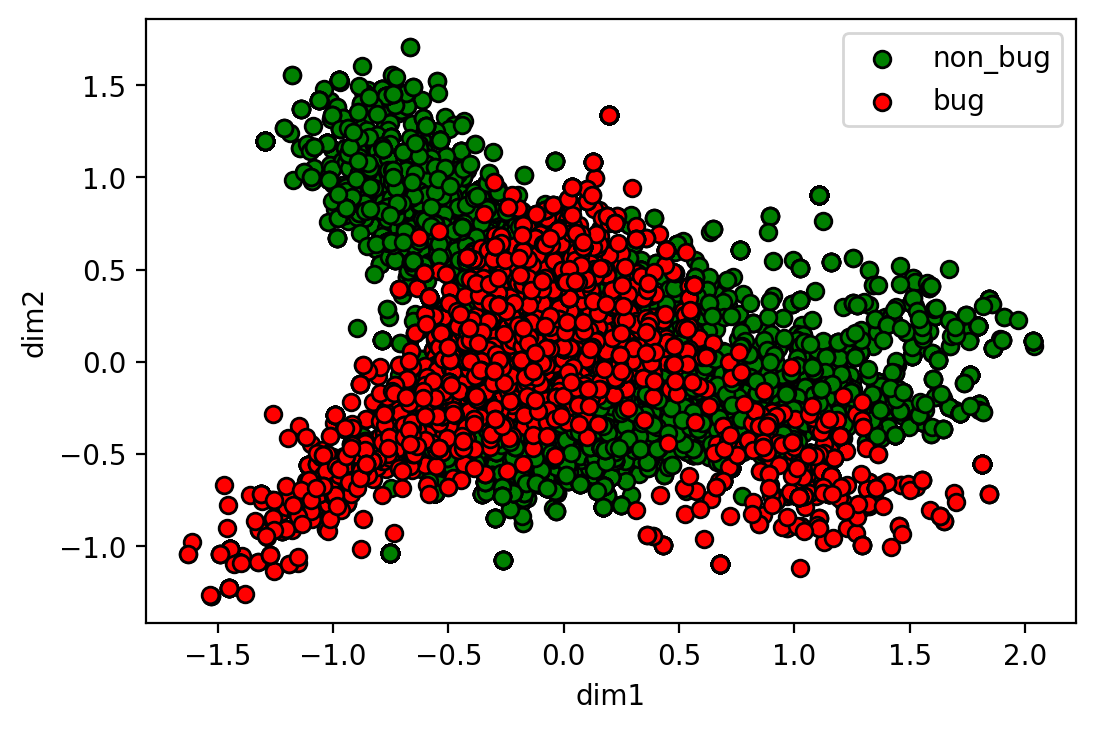

In [9]:
plt.figure(dpi=200)
x1 = bug_reduced_data
x2 = non_bug_reduced_data
plt.scatter(x2[:, 0], x2[:, 1], color='green',edgecolors='black', label='non_bug', alpha=1)
plt.scatter(x1[:, 0], x1[:, 1], color='red',edgecolors='black', label='bug',alpha=1)

# plt.title('K-means')
plt.axis('on')
plt.legend()
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.savefig('./pic/tag_vec.jpg',bbox_inches = 'tight')

# centroids = model.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
# color_list=[ '#000080', '#006400','#00CED1', '#800000', '#800080',
#              '#CD5C5C', '#DAA520', '#E6E6FA', '#F08080', '#FFE4C4']

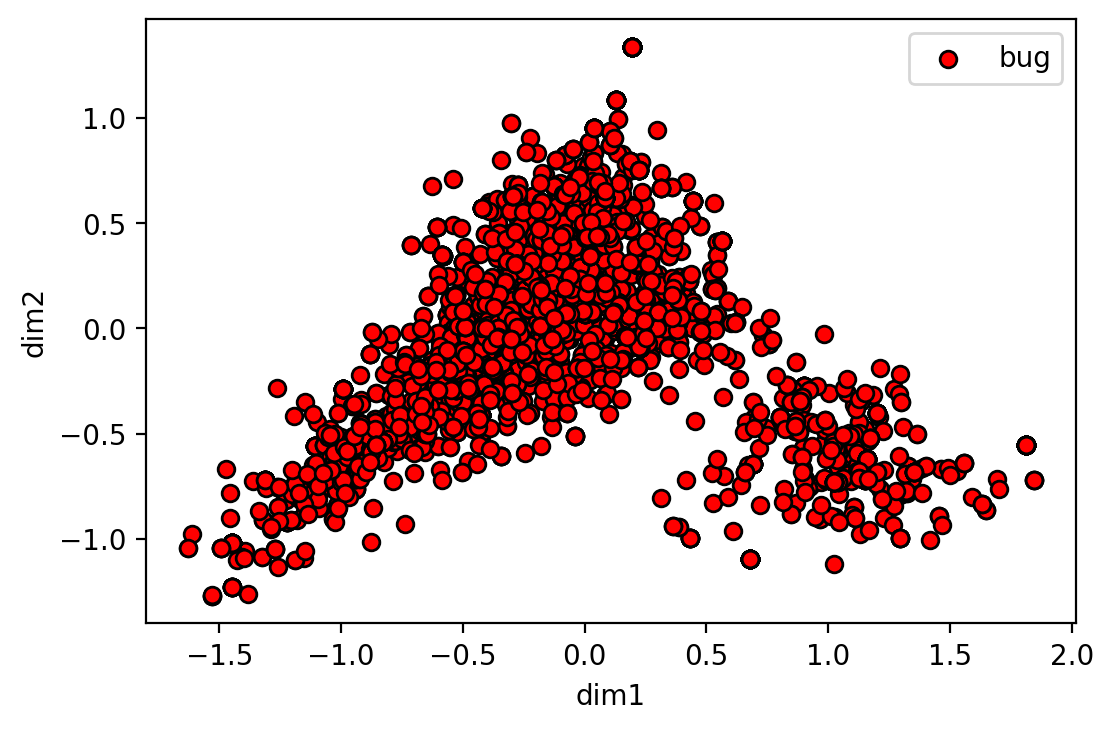

In [11]:
plt.figure(dpi=200)
color_list=[ '#000080', '#006400']



plt.scatter(x1[:, 0], x1[:, 1], color='red',edgecolors='black', label='bug',alpha=1)
# plt.scatter(x2[:, 0], x2[:, 1], color='green',edgecolors='black', label='non_bug', alpha=0.5)
# plt.title(' ')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('on')
plt.legend()
plt.savefig('./pic/tag_vec_bug.jpg',bbox_inches = 'tight')


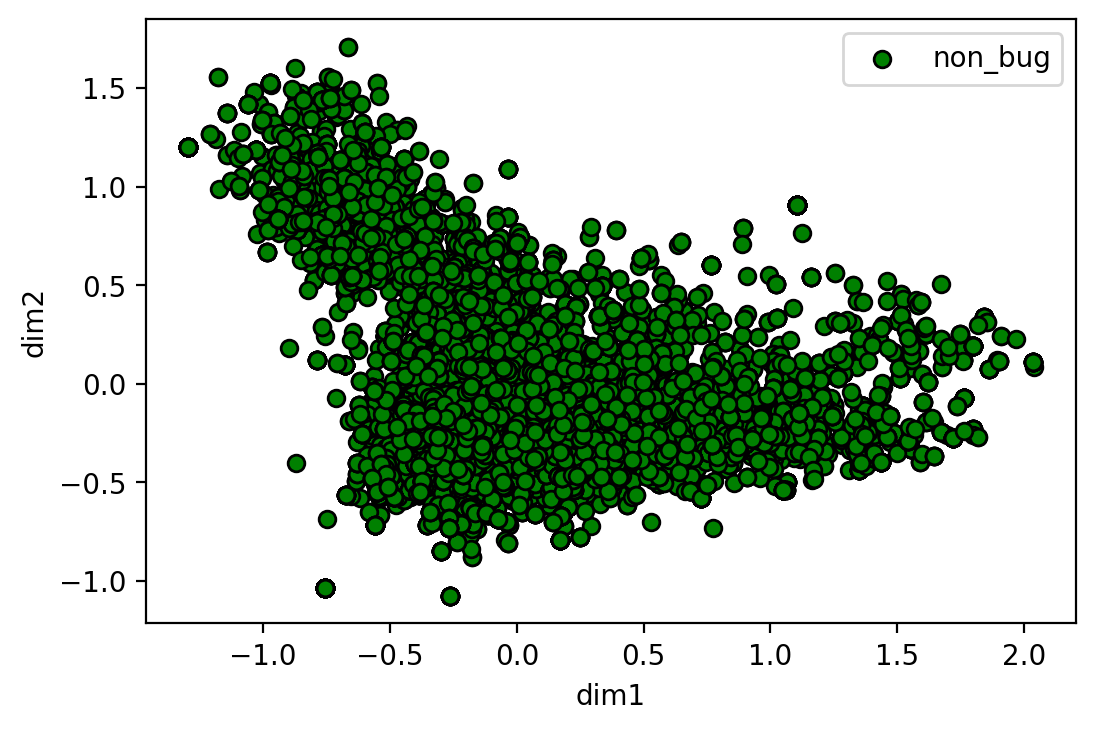

In [10]:
plt.figure(dpi=200)
x2 = non_bug_reduced_data
# plt.scatter(x1[:, 0], x1[:, 1], color='red',edgecolors='black', label='bug',alpha=0.5)
plt.scatter(x2[:, 0], x2[:, 1], color='green',edgecolors='black', label='non_bug', alpha=1)
# plt.title('K-means')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('on')
plt.legend()
plt.savefig('./pic/tag_vec_nonbug.jpg',bbox_inches = 'tight')

In [16]:
x1.mean(axis=0)

array([-2.1082496e-17, -7.2223204e-17])

In [17]:
x2.mean(axis=0)

array([ 3.75218250e-17, -4.72471257e-18])

In [89]:
from sklearn.decomposition import PCA
bug_reduced_data = PCA(n_components=3).fit_transform(bug_vec)
non_bug_reduced_data = PCA(n_components=3).fit_transform(non_bug_vec)